# Mini-Project 2

Welcome to your second Mini-Project! You will use numpy to build neural networks to predict the house price in Boston. Look for "TODO" inside the code block and complete the required tasks.

---
**Note**: In this project you can **ONLY** use numpy and matplotlib packages.

## Problem Description
 This data was collected in 1978 and each of the 506 entries represents aggregate information about homes from various suburbs located in Boston. Once you get a good fit, you can use this model to predict the monetary value of a house located at the Boston’s area. A model like this would be very valuable for a real state agent who could make use of the information provided in a dayly basis.

The dataset will be like:

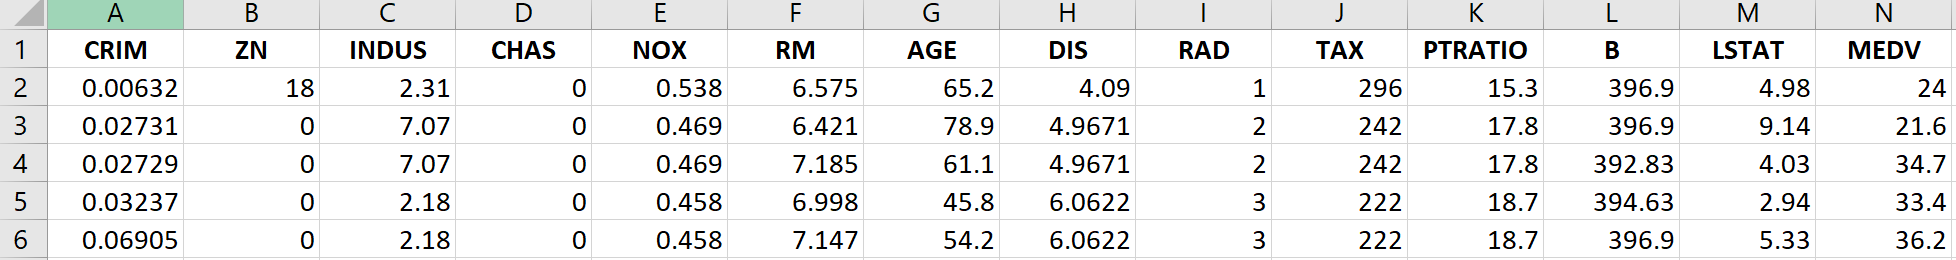

**Features**:
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000usd
- PTRATIO: pupil-teacher ratio by town
- B: $1000(B_k - 0.63)^2$ where $B_k$ is the proportion of blacks by town
- LSTAT: percentage lower status of the population

**Label**:
- MEDV: This is the median value of owner-occupied homes in $1000s

In [49]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Task 1: Read and Preprocess Data

In this section, you will implement the `DataPreprocessing` utility class to provide the training data and the test data for the downstream regressor based on Neural Networks.

### Task 1.1: Implement utility class

**Requirements:**

- Use `np.fromfile('filename.data', sep=" ")` to read data.
- Usually, the raw dataset will be **randomly** divided into training set and test set according to the given size of the training set.
- **Min-max scaler** transforms features X by scaling each feature to a given range $[a, b]$. The transformation is given by:
$$X_{\text{std}}=\frac{X - X_{\text{min}}}{X_{\text{max}}-X_{\text{min}}}$$
$$X_{\text{scaled}}=X_{\text{std}}\cdot(b-a) + a$$

In [50]:
class DataPreProcessing:
    def __init__(self):
        pass
    
    @staticmethod
    def read_data(file, separator):
        """
        Use the Numpy function fromfile() to load the dataset from the given file.
        
        Parameters
        ----------
        file: string
            String path of the data file.
        separator: string
            Separator between items if file is a text file.

        Return
        ----------
        data: ndarray
            Data read from the given file.
        """
        # TODO: write your code here
        
        dataset=np.fromfile(file, sep=separator)
        
        #Dataset is read from the given file and made in ndarray
        
        dataset=np.ndarray((506,14),buffer=np.array(dataset),dtype=float)
        return dataset

    @staticmethod
    def train_test_split(data, train_size, shuffle=True):
        """
        Split the given data into random train and test subsets. 
        
        Parameters
        ----------
        data: ndarray
            Input of the given data.
        train_size: float
            The proportion of the dataset to include in the train split.
        shuffle: bool
            Whether or not to shuffle the data before splitting.

        Return
        ----------
        train_data: ndarray
            Output of the training data.
        test_data: ndarray
            Output of the test data.
        """
        # TODO: write your code here
        
        #the raw dataset will be randomly divided into training set and test set
        if shuffle:
            np.random.shuffle(data)
        
        #creating a slice index based on train_size 
        
        sliceidx= int(train_size*np.shape(data)[0])
        
        train_data=data[:sliceidx,:]
        test_data=data[sliceidx:,:] 
        
        return np.array(train_data),np.array(test_data)
            


    @staticmethod
    def minmax_scale(X, feature_range=(0, 1)):
        """
        Transform features X by scaling each feature to a given range. 
        
        Parameters
        ----------
        data: ndarray
            Input of the given data.
        feature_range: tuple
            Desired range of transformed data.

        Return
        ----------
        X_scaled: ndarray
            Output of the scaled features.
        """
        # TODO: write your code here
        
        x_array=[]
        
        #transpose to preprocess
        X=X.T
        
        for i in range(len(X)):
            
            xrow_array=[]
            x_min=min(X[i])
            x_max=max(X[i])
            
            for j in range(len(X[i])):
                #scaling each feature to a given range
                x_std =(X[i][j]-x_min)/(x_max-x_min)  
                
                x_scaled=(x_std*(feature_range[1]-feature_range[0])+feature_range[0])
                
                xrow_array.append(x_scaled)
            x_array.append(xrow_array)
        #setting into numpy array    
        x_array=np.array(x_array).T
        
        return x_array

    



### Task 1.2 Apply utility class

Apply your implemented utility class to complete the data reading and preprocessing.

**Requirements**:
- `X_train` should be an $n\times m$ matrix where $n$ is the number of features and $m$ is the number of training examples. In this project, $n=13$ and $m=\lfloor0.8\times506\rfloor$.
- The shape of `y_train` should be $1\times m$ where $m$ is the number of training examples.
- `X_test` and `y_test` should have the similar shape.

In [51]:
# Init the train size
train_size = 0.8

# TODO: init an object of DataPreProcessing
DPP=DataPreProcessing()

# TODO: read the data from the data file
mydata=DPP.read_data("housing.data"," ")

# TODO: split the data random train and test subsets.
mytrain,mytest=DPP.train_test_split(mydata,train_size,True)

# TODO: split the training subset into X_train and y_train
X_train=mytrain[:,:np.shape(mytrain)[1]-1]
y_train=mytrain[:,np.shape(mytrain)[1]-1:]

# TODO: split the test subset into X_test and y_test
X_test=mytest[:,:np.shape(mytest)[1]-1]
y_test=mytest[:,np.shape(mytest)[1]-1:]

# TODO: 0-1 scale X_train and X_test respectively
X_train = DPP.minmax_scale(X_train, feature_range=(0, 1))
X_test = DPP.minmax_scale(X_test, feature_range=(0, 1))

# TODO: reshape X_train, X_test, y_train, and y_test to satisfy the requirments
X_train=X_train.T
X_test=X_test.T
y_train=y_train.T
y_test=y_test.T


In [52]:
# Test code
assert X_train.shape == (13, 404), "X_train should be a 13 by 404 matrix."
assert y_train.shape == (1, 404), "y_train should be a 1 by 404 matrix."
assert X_test.shape == (13, 102), "X_test should be a 13 by 102 matrix."
assert y_test.shape == (1, 102), "y_test should be a 1 by 102 matrix."

print('Great')

Great


## Task 2: Shallow Neural Network
In this task, you will create a shallow neural network with **only one hidden layer** to predict the Boston house price.

### Task 2.1: Initialize model parameters
Since the model is a two-layer (one hidden layer and an output layer) neural network, model parameters will be $W_1$, $b_1$, $W_2$, and $b_2$. In this task, you should implement a function of `init_params` to create a dictionary which is used to save model parameters and initialize parameters based on [He method](https://towardsdatascience.com/weight-initialization-techniques-in-neural-networks-26c649eb3b78).

**Hints:**
- $W_1$ should be an $l_1\times l_0$ matrix where $l_1$ is the hidden layer size and $l_0$ is the feaure dimension of input samples.
- $b_1$ should be an $l_1\times1$ matrix.
- $W_2$ and $b_2$ should have the silimar dimensionality.
- Use `np.random.randn()` to generate random values.

In [53]:
def init_params(input_layer_size, hidden_layer_size, output_layer_size):
    """
    Initialize model parameters based on He initialization method.
        
    Parameters
    ----------
    input_layer_size: int
        Number of features in the input sample.
    hidden_layer_size: int
        Number of neurons in the hidden layer.
    output_layer_size: int
        Number of neurons in the output layer.

    Return
    ----------
    W1: ndarray
        Output of initialized W1.
    b1: ndarray
        Output of initialized b1.
    W2: ndarray
        Output of initialized W2.
    b2: ndarray
        Output of initialized b2.
    """
    # TODO: write your code here
    
    # Randomnly initializing weights using He initialization method for hidden layer 
    
    W1=np.random.randn(hidden_layer_size,input_layer_size)*np.sqrt(2/input_layer_size)
    
    #Initializing biases for hidden layer 
    
    b1=np.random.randn(hidden_layer_size,1)
    
    # Randomnly initializing weights using He initialization method for output layer
    
    W2=np.random.randn(output_layer_size,hidden_layer_size)*np.sqrt(2/hidden_layer_size)
    
     #Initializing biases for output layer 
    
    b2=np.random.randn(output_layer_size,1)
    
    return W1,b1,W2,b2

### Task 2.2: Implement ReLU activation function
ReLU is the most common activation function used in neural networks. Implement the ReLU function and use it in your model.
$$a = \begin{cases}
   z &\text{if } z>0 \\
   0 &\text{if } z\le0
\end{cases}$$

$$\frac{da}{dz} = \begin{cases}
   1 &\text{if } z>0 \\
   0 &\text{if } z\le0
\end{cases}$$

In [54]:
def relu(Z, derivative=False):
    """
    If derivative=False, return the result transformed by the ReLU function.
    If derivative=True, return the result transformed by the derivative of the ReLU function.

    Parameters
    ----------
    Z: ndarray
        Input of the given data.
    derivative: bool.
        Whether or not to take the derivative of the ReLU function.

    Return
    ----------
    A: ndarray
        Output of the transformed matrix.
    """
    # TODO: write your code here
    # initializing the A matrix with zeros as same size as Z matrix
    rows = Z.shape[0]
    cols = Z.shape[1]
    
    A = [[0 for _ in range(cols)]]*rows  
    
    # since A and derivative of A with Z will remain zero in case of Z<=0 , this condition is skipped
    
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            
            # change element of A for Z>0 and for both derivative of A=1 and A=Z
               if Z[i][j]>0 :
                    if derivative:
                        A[i][j]=1
                    else :
                        A[i][j] = Z[i][j]
                        
            # no changes for z<=0 as A has 0 matrix
                           
    return np.array(A)
    
    

### Task 2.3: Implement forward propagation function
The forward function is used to define how your model is going to be run, from input to output.

**Hints:**
- Computations in the forward propagation:
$$Z^{[1]}=W^{[1]}X+b^{[1]}$$
$$A^{[1]}=g(Z^{[1]})$$
$$Z^{[2]}=W^{[2]}A^{[1]}+b^{[2]}$$
$$\hat{y}=g(Z^{[2]})$$
where $g()$ is the ReLU activation function.

In [55]:
def forward(X, W1, b1, W2, b2):
    """
    Generates output predictions for the input samples with given params.
        
    Parameters
    ----------
    X: ndarray
        Input samples with shape of n x m where n is the feature dimension 
        and m is the number of samples.
    W1: ndarray
        Weights of the hidden layer.
    b1: ndarray
        Intercepts of the hidden layer.
    W2: ndarray
        Weights of the output layer.
    b2: ndarray
        Intercepts of the output layer.

    Return
    ----------
    Z1: ndarray
        Output of the hidden layer before applying activation function.
    A1: ndarray
        Output of the hidden layer
    Z2: ndarray
        Output of the output layer before applying activation function.
    A2: ndarray
        Output of the output layer.
    """
    # TODO: write your code here
    # Formulating for Z and A matrices based on Vectorized formulae
    
    # Z and A for hidden layer 
    
    Z1 = np.dot(W1,X)+ b1

    A1 = relu(Z1,False)
    
      # Z and A for outputlayer 

    Z2 = np.dot(W2,A1)+ b2
    
    A2 = relu(Z2,False)

    return Z1,A1,Z2,A2

### Task 2.4: Implement loss function
For this regression problem, we will use mean squared error (MSE) as the loss function.
$$J=\frac{1}{2m}\sum_{i=1}^m\left(\hat{y}^{(i)} - y^{(i)}\right)^2$$

In [56]:
def loss(y_truth, y_pred):
    """
    Return the mean squared error between the ground truth and predictions.
        
    Parameters
    ----------
    y_truth: ndarray
        An 1 x m matrix of ground truth.
    y_pred: ndarray
        An 1 x m matrix of predictions.

    Return
    ----------
    loss: float
        Output of the mean squared error.
    """
    # TODO: write your code here
    
    m = y_truth.shape[1]
    #mean squared error    
    error= np.square(y_pred - y_truth)
    #loss calculated
    loss= (0.5)*np.sum(error)*(1/m)
    
    return loss
    

### Task 2.5: Implement backpropagation function
The backward calculates the gradient of the loss function with respect to the neural network's weights and intercepts.


In [57]:
def backward(X, y, Z1, A1, Z2, A2, W1, b1, W2, b2):
    """
    Return the gradient of the loss function with respect to the model's weights.
        
    Parameters
    ----------
    X: ndarray
        Input samples with shape of n x m where n is the feature dimension 
        and m is the number of samples.
    y: ndarray
        An 1 x m matrix of ground truth.
    Z1: ndarray
        Output of the hidden layer before applying activation function.
    A1: ndarray
        Output of the hidden layer.
    Z2: ndarray
        Output of the output layer before applying activation function.
    A2: ndarry
        Output of the output layer.
    W1: ndarray
        Weights of the hidden layer.
    b1: ndarray
        Intercepts of the hidden layer.
    W2: ndarray
        Weights of the output layer.
    b2: ndarray
        Intercepts of the output layer.

    Return
    ----------
    dW1: ndarray
        Gradients of weiths at the hidden layer.
    db1: ndarray
        Gradients of intercepts at the hidden layer.
    dW2: ndarray
        Gradients of weiths at the output layer.
    db2: ndarray
        Gradients of intercepts at the output layer.
    """
    # TODO: write your code here
    
    m=y.shape[1]
    # gradient and weights and biases for output layer 
    dZ2 = A2 - y
    dW2 =(1/m)*np.dot(dZ2,A1.T)
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
    
    # gradient and weights and biases for hidden layer 
    g1=relu(Z1,True)
    dZ1 = np.dot(W2.T,dZ2)*g1
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)
    
    return dW1,db1,dW2,db2

### Task 2.6: Implement update function
In this part, we will update model parameters according to the generated gradients.
$$W:=W-\alpha\cdot dW$$
$$b:=b-\alpha\cdot db$$

In [58]:
def update(lr, W1, b1, W2, b2, dW1, db1, dW2, db2):
    """
    Return updated parameters based on the gradient descent optimization. 
        
    Parameters
    ----------
    lr: float
        Learning rate.
    W1: ndarray
        Weights of the hidden layer.
    b1: ndarray
        Intercepts of the hidden layer.
    W2: ndarray
        Weights of the output layer.
    b2: ndarray
        Intercepts of the output layer.
    dW1: ndarray
        Gradients of weiths at the hidden layer.
    db1: ndarray
        Gradients of intercepts at the hidden layer.
    dW2: ndarray
        Gradients of weiths at the output layer.
    db2: ndarray
        Gradients of intercepts at the output layer.

    Return
    ----------
    W1_: ndarray
        Updated weights of the hidden layer.
    b1_: ndarray
        Updated intercepts of the hidden layer.
    W2_: ndarray
        Updated weights of the output layer.
    b2_: ndarray
        Updated intercepts of the output layer.
    """
    # TODO: write your code here
       
    # Updating the weights and biases of every layers in backward propogation
    #weights and biases based on gradients of Hidden Layer
    W1_= W1-lr*dW1
    b1_= b1-lr* db1
    #Weights and biases based on gradients of output layer
    W2_= W2-lr*dW2
    b2_= b2-lr* db2
    
    return W1_,b1_,W2_,b2_    

### Task 2.7: Implement train function
So far, you have implemented functions that are required to train the neural network model. It's time to organize them and complete the training step. Let's keep moving on!

**Note:** Since you have learned how to create small batches in Mini-Project 1, just directly use the given `create_batches()`.

In [59]:
def create_batches(X, y, batch_size):
    """
    Split the data X and y with given batch size.

    Parameters
    ----------
    X: ndarray
        Features with shape n by m.
    y: ndarray
        Labels with shape k by m.
    batch_size: int
        Batch size.

    Return
    ----------
    batches_X: list
        Created small batches of X.
    batches_y: list
        Created small batches of y.
    """
    # Get the number of examples
    m = X.shape[1]
    # Get label dimension
    k = y.shape[0]

    # Init variables to save batches
    batches_X = []
    batches_y = []
    
    # Combine X and y
    data = np.vstack((X, y))
    np.random.shuffle(data.T)
        
    # Calcuate the number of mini batches
    n_minibatches = m // batch_size 

    for i in range(n_minibatches): 
        mini_batch = data[:, i * batch_size:(i + 1) * batch_size]        
        batches_X.append(mini_batch[:-k, :])
        batches_y.append(mini_batch[-k:, :])
        
    # Handle the rest data
    if m % batch_size != 0: 
        mini_batch = data[:, n_minibatches * batch_size:]        
        batches_X.append(mini_batch[:-k, :])
        batches_y.append(mini_batch[-k:, :])
        
    return batches_X, batches_y

In [60]:
def train(X_train, y_train, X_test, y_test, W1, b1, W2, b2, lr, batch_size, epochs):
    """
    Train the model based on the mini-batch graient descent.

    Parameters
    ----------
    X_train: ndarray
        Features of the training data with shape n by m1.
    y_train: ndarray
        Labels of the training data with shape 1 by m1.
    X_test: ndarray
        Features of the training data with shape n by m2.
    y_test: ndarray
        Labels of the training data with shape 1 by m2.
    W1: ndarray
        Initial weights of the hidden layer.
    b1: ndarray
        Initial intercepts of the hidden layer.
    W2: ndarray
        Initial weights of the output layer.
    b2: ndarray
        Initial intercepts of the output layer.
    lr: float
        Learning rate.
    batch_size: int
        Batch size.
    epochs: int
        Number of epochs to train the model. An epoch is an iteration over 
        the entire x and y data provided.

    Return
    ----------
    training_loss_history: list
        Each entry stands for the average training loss of all iterations in a certain epoch.
    test_loss_history: list
        A record of test losses.
    """
    # TODO: write your code here
    #create the train X and y minibatches 
    batches_X, batches_y = create_batches(X_train, y_train, batch_size)
    # initializing lists for training loss and Testing loss history
    training_loss_history=[]
    test_loss_history=[]
    
    #looping for each epoch
    for epoch in range(epochs):
        
        train_loss=0
        test_loss=0

        # passing the train data created by mini batch function in batches
        
        for batch in range(len(batches_y)):   

            Z1 ,A1 ,Z2 ,A2  = forward(batches_X[batch], W1, b1, W2, b2) # forward propogation

            train_loss += loss(batches_y[batch], A2) #calculating training loss

            dW1 ,db1 ,dW2 ,db2  = backward(batches_X[batch], batches_y[batch],Z1 ,A1 ,Z2 ,A2, W1, b1, W2, b2) # backward propogation
            
            W1,b1,W2,b2= update(lr, W1, b1, W2, b2,  dW1 ,db1 ,dW2 ,db2 ) #updating weights and biases for next epoch

        training_loss_history.append(train_loss/len(batches_y))  # average training loss in 1 epoch
        
        # passing the entire test data
        
        Z1_test, A1_test, Z2_test, A2_test = forward(X_test, W1, b1, W2, b2) # forward propogation of test data
        
        test_loss = loss(y_test, A2_test) #testing loss 
        
        test_loss_history.append(test_loss) # test loss in one epoch
        
        print("the epoch number is :",epoch,"Training loss is :",train_loss/len(batches_y))
        print("the epoch number is :",epoch,"Testing loss is :", test_loss)
        
    print("Final Training loss: ",training_loss_history[-1])
    print("Final Testing loss: ",test_loss_history[-1])
    return training_loss_history,  test_loss_history

### Task 2.8: Run your network
Congratulations! You have done everything to build a neural network. Run your model and plot the training losses and test lossses in the **same** figure where x-axis is epoch. 

In [61]:
# Init hyperparameters
epochs = 200
lr = 0.001
batch_size = 64
hidden_layer_size = 13
input_layer_size = 13
output_layer_size = 1

# TODO: initialize model parameters
W1,b1,W2,b2 = init_params(input_layer_size, hidden_layer_size, output_layer_size)

# TODO: train the model

training_loss_history,test_loss_history = train(X_train, y_train, X_test, y_test, W1, b1, W2, b2, lr, batch_size, epochs)


the epoch number is : 0 Training loss is : 258.67898333528365
the epoch number is : 0 Testing loss is : 232.62328651384195
the epoch number is : 1 Training loss is : 175.15512593616236
the epoch number is : 1 Testing loss is : 175.9565880387219
the epoch number is : 2 Training loss is : 132.48479826724227
the epoch number is : 2 Testing loss is : 143.91765029511959
the epoch number is : 3 Training loss is : 106.70282785263828
the epoch number is : 3 Testing loss is : 122.1893337127607
the epoch number is : 4 Training loss is : 89.01599209008509
the epoch number is : 4 Testing loss is : 106.42371156403505
the epoch number is : 5 Training loss is : 76.50826273450762
the epoch number is : 5 Testing loss is : 94.96223098483858
the epoch number is : 6 Training loss is : 67.84420759282287
the epoch number is : 6 Testing loss is : 86.84679866913912
the epoch number is : 7 Training loss is : 62.07573447647182
the epoch number is : 7 Testing loss is : 81.2660029102841
the epoch number is : 8 Tr

### Task 2.9: Visualize training process

Plot out the training loss curve and the test loss curve in the same figure.

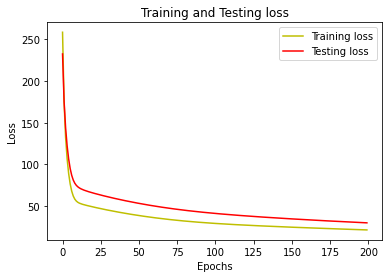

In [62]:
# TODO: plot the training history
import matplotlib.pyplot as plt

# Training and testing losses plotting 
epochs= range (0,200)

plt.plot(epochs,training_loss_history,'y', label='Training loss')

plt.plot(epochs,test_loss_history,'r', label='Testing loss')

plt.title('Training and Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Task 3: Deep Neural Network
Hopefully, you have mastered shallow neural networks after finishing Task 2. Let's move to the deep neural network. In this task, you will be asked to implement the `DNN` class that can be utilized to create deep neural networks with the given model configuration.

### Task 3.1: Implement DNN class
Unlike Task 2, you should try another programming model called Object-oriented programming (OOP). Don't be overwhelmed with the following code. You can efficiently complete this task by reusing most of your code in Task 2.

In [66]:
class DNN:
    def __init__(self, input_size, layer_sizes, epochs=100, lr=0.001, batch_size=64):
        """
        Parameters
        ----------
        input_size: int
            Number of features in the inputs.
        layer_sizes: list
            Number of units in each hidden layer and the output. 
        epochs: int
            Number of epochs to train the model
        lr: float
            Learning rate.
        batch_size: int
            Batch size.
        """
        self.input_size = input_size
        self.layer_sizes = layer_sizes
        self.batch_size = batch_size
        self.epochs = epochs
        self.lr = lr

        # Init model parameters
        self.params = self._init_params()
    
    def _init_params(self):
        """ 
        Initialize model parameters based on He method.

        Return
        ----------
        params: dict
            Initialized model parameters represented by key-value pairs.
        """
        # TODO: write your code here
        params = {}
        
        inputlayer = self.input_size
        
        #iterating over layers to create weights using he method and biases, 
        # creating params dictonary using weight and biases for each layers as keys
        
        for l in range(len(self.layer_sizes)):
            
            params['W'+str(l+1)] = np.random.randn(self.layer_sizes[l],inputlayer)*np.sqrt(2/inputlayer)
            
            params['b'+str(l+1)] = np.random.randn(self.layer_sizes[l],1)
            
            inputlayer=self.layer_sizes[l]
            
        return params
    
    def _relu(self, Z, derivative=False):
        """
        If derivative=False, return the result transformed by the ReLU function.
        If derivative=True, return the result transformed by the derivative of the ReLU function.

        Parameters
        ----------
        Z: ndarray
            Input of the given data.
        derivative: bool.
            Whether or not to take the derivative of the ReLU function.

        Return
        ----------
        A: ndarray
            Output of the transformed matrix.
        """
        # TODO: write your code here
        
                
        rows = Z.shape[0]
        cols = Z.shape[1]
        #Initializing A matrix of zeros with size same as Z 
        A = [[0 for _ in range(cols)]]*rows  

        for i in range(Z.shape[0]):
            for j in range(Z.shape[1]):
                #Updating A only when Z > 0 and derivative condition True or False
                if Z[i][j] > 0 :
                        if derivative:
                            A[i][j]=1
                        else :
                            A[i][j] = Z[i][j]
                            
        # NO change in A matrix for Z <=0
        return np.array(A)


    def _forward(self, X):
        """
        Generates output predictions for the input samples with given params.
            
        Parameters
        ----------
        X: ndarray
            Input samples with shape of n x m where n is the feature dimension 
            and m is the number of samples.

        Return
        ----------
        output_layers: dict
            Outputs of each layer represented by key-value pairs.
        """
        # TODO: write your code here
        output_layers= {}
        # initializing Activation = X for first iteration
        A = X
        
        # iterating over each layer to calculate Z and Activation function A
        # creating dictonaries using Z and A for each layer as keys
        
        for l in range(len(self.layer_sizes)):
            
            output_layers['Z'+str(l+1)] = np.dot(self.params['W'+str(l+1)],A)+ self.params['b'+str(l+1)]

            output_layers['A'+str(l+1)]= DNN._relu(self,output_layers['Z'+str(l+1)],False)
            
            A = output_layers['A'+str(l+1)]

        return output_layers

    @staticmethod
    def mse(y_truth, y_pred):
        """
        Return the mean squared error between the ground truth and predictions.
            
        Parameters
        ----------
        y_truth: ndarray
            An 1 x m matrix of ground truth.
        y_pred: ndarray
            An 1 x m matrix of predictions.

        Return
        ----------
        loss: float
            Output of the mean squared error.
        """
        # TODO: write your code here
        m = y_truth.shape[1]
        # calculate mean square error
        error= np.square(y_pred - y_truth)
        #calculating loss
        loss= (0.5)*np.sum(error)*(1/m)

        return loss

    
    def _backward(self, X, y, output_layers):
        """
        Return the gradient of the loss function with respect to the model's weights.
            
        Parameters
        ----------
        X: ndarray
            Input samples with shape of n x m where n is the feature dimension 
            and m is the number of samples.
        y: ndarray
            An 1 x m matrix of ground truth.
        output_layers: dict
            Outputs of each layer represented by key-value pairs.

        Return
        ----------
        gradients: dict
            Gradients of weights and intercepts at each layers.
        """
        # TODO: write your code here
        
        m=y.shape[1]
        
        gradients={}
        
        # initializing dZ of output layer

        dZ = output_layers['A' + str(len(self.layer_sizes))] - y
        
        # Iterating over the layers for gradients of weights and biases for update function 
        #creating dictonary of gradients used to update weights and biases
        
        for l in range(len(self.layer_sizes),1,-1):
        
            gradients['dW'+str(l)] =(1/m)*np.dot( dZ ,output_layers['A'+str(l-1)].T)

            gradients['db'+str(l)] = (1/m)*np.sum(dZ,axis=1,keepdims=True)

            g = DNN._relu(self,output_layers['Z'+str(l-1)],True)

            dZ = np.dot(self.params['W'+str(l)].T,dZ) * g
            
        # gradients of first layer

        gradients['dW1'] = (1/m)*np.dot(dZ,X.T)

        gradients['db1'] = (1/m)*np.sum(dZ,axis=1,keepdims=True)
        

        return gradients


    def _update(self, gradients):
        """
        Update network parameters according to the update rule of gradient descent. 
            
        Parameters
        ----------
        gradients: dict
            Parameter gradients.
        """
        # TODO: write your code here
        
        # Updating the weights and biases of every layers in backward propogation
        
        for l in range(len(self.layer_sizes)):
        
            self.params['W'+str(l+1)]= self.params['W'+str(l+1)]-self.lr*gradients['dW'+str(l+1)]

            self.params['b'+str(l+1)]= self.params['b'+str(l+1)]-self.lr*gradients['db'+str(l+1)]
        

    

    def train(self, X_train, y_train, X_test, y_test):
        """
        Train the model based on mini-batch graient descent.

        Parameters
        ----------
        X_train: ndarray
            Features of the training data with shape n by m1.
        y_train: ndarray
            Labels of the training data with shape 1 by m1.
        X_test: ndarray
            Features of the training data with shape n by m2.
        y_test: ndarray
            Labels of the training data with shape 1 by m2.

        Return
        ----------
        training_loss_history: list
            Entries are average training losses of all iterations in one epoch.
        test_loss_history: list
            A record of test loss values.
        """
        # TODO: write your code here
        
        #Training the model using mini batches of X and Y training data
        
        batches_X, batches_y = DNN._create_batches(self,X_train, y_train)
      
        training_loss_history=[]

        test_loss_history=[]

        for epoch in range(self.epochs):

            train_loss=0
            test_loss=0

            for batch in range(len(batches_y)):   

                output_layers  = DNN._forward(self,batches_X[batch])# forward propogation

                train_loss += DNN.mse(batches_y[batch],output_layers['A'+str(len(self.layer_sizes))]) # calculating training loss

                gradients = DNN._backward(self,batches_X[batch], batches_y[batch],output_layers)# backward propogation

                DNN._update(self,gradients) #updating weights and biases

            training_loss_history.append(train_loss/len(batches_y)) #Average training loss over 1 epoch

            output_layers_test = DNN._forward(self,X_test) #forward propogate of test data

            test_loss = DNN.mse(y_test, output_layers_test['A'+str(len(self.layer_sizes))]) #Testing loss

            test_loss_history.append(test_loss)#Testing loss in 1 epoch

            print("the epoch number is :",epoch,"Training loss is :",train_loss/len(batches_y))
            print("the epoch number is :",epoch,"Testing loss is :", test_loss)

        print("Final Training loss: ",training_loss_history[-1])
        print("Final Testing loss: ",test_loss_history[-1])
            
        return training_loss_history,  test_loss_history
        
    
    def _create_batches(self, X, y):
        """
            Split X and y into small batches with given batch size.

            Parameters
            ----------
            X: ndarray
                Features with shape n by m.
            y: ndarray
                Labels with shape k by m.
            batch_size: int
                Batch size.

            Return
            ----------
            batches_X: list
                Created small batches of X.
            batches_y: list
                Created small batches of y.
        """
        # Get the number of examples
        m = X.shape[1]
        # Get label dimension
        k = y.shape[0]

        # Init variables to save batches
        batches_X = []
        batches_y = []
        
        # Combine X and y
        data = np.vstack((X, y))
        np.random.shuffle(data.T)
            
        # Calcuate the number of mini batches
        n_minibatches = m //self.batch_size 

        for i in range(n_minibatches): 
            mini_batch = data[:, i * self.batch_size:(i + 1) * self.batch_size]        
            batches_X.append(mini_batch[:-k, :])
            batches_y.append(mini_batch[-k:, :])
            
        # Handle the rest data
        if m % self.batch_size != 0: 
            mini_batch = data[:, n_minibatches * self.batch_size:]        
            batches_X.append(mini_batch[:-k, :])
            batches_y.append(mini_batch[-k:, :])
            
        return batches_X, batches_y
    


### Task 3.2: Run your model
Run your model and plot the training losses and test lossses in the **same** figure where x-axis is epoch. 

In [67]:
# Init hyperparameters
epochs = 200
lr = 0.001
batch_size = 64
layer_sizes = [15, 13, 8, 1]

# TODO: create an instance of your DNN class

myclass=DNN( 13, layer_sizes, epochs, lr, batch_size)

# TODO: train the model

train,test = myclass.train( X_train, y_train, X_test, y_test)

the epoch number is : 0 Training loss is : 49.32776396268038
the epoch number is : 0 Testing loss is : 60.34558785253286
the epoch number is : 1 Training loss is : 45.428197707660146
the epoch number is : 1 Testing loss is : 57.79830346566106
the epoch number is : 2 Training loss is : 43.96429811952696
the epoch number is : 2 Testing loss is : 56.03914760317807
the epoch number is : 3 Training loss is : 43.782674486667936
the epoch number is : 3 Testing loss is : 57.588112749021704
the epoch number is : 4 Training loss is : 43.63943182193332
the epoch number is : 4 Testing loss is : 74.04815891831466
the epoch number is : 5 Training loss is : 62.71856028890034
the epoch number is : 5 Testing loss is : 144.21425067794846
the epoch number is : 6 Training loss is : 124.85691202214024
the epoch number is : 6 Testing loss is : 88.84884788114945
the epoch number is : 7 Training loss is : 74.55473904644282
the epoch number is : 7 Testing loss is : 93.05693972329553
the epoch number is : 8 Tra

### Task 3.3: Visualize performance

Plot out the training loss curve and the test loss curve in the same figure.

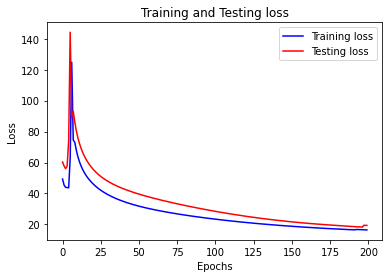

In [68]:
# TODO: plot the training history and test loss curve in same figure
epochs= range (0,200)
plt.plot(epochs,train,'b', label='Training loss')
plt.plot(epochs,test,'r', label='Testing loss')
plt.title('Training and Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()